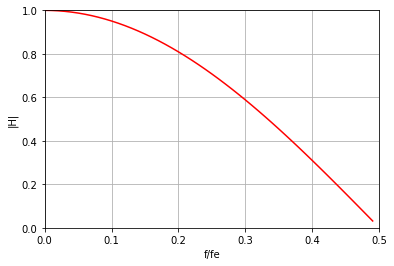

In [3]:
import numpy as np
import math
import cmath
from matplotlib.pyplot import *
def H(Z):
    return 0.5*(1.0+Z**(-1))
def Hf(f):
    return H(np.exp(1j*2*math.pi*f))
f = np.arange(start=0.0,stop=0.5,step=0.01)
figure(figsize=(6,4))
plot(f,np.absolute(Hf(f)),'r')
xlabel('f/fe')
ylabel('|H|')
axis([0,0.5,0,1])
grid()

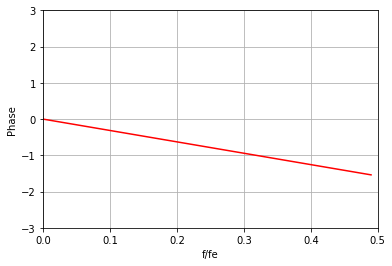

In [4]:
phase = np.unwrap(np.angle(Hf(f)))
figure(figsize=(6,4))
plot(f,phase,'r')
xlabel('f/fe')
ylabel('Phase')
axis([0,0.5,-3,3])
grid()   

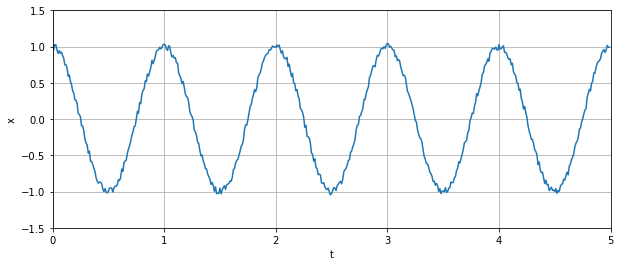

In [7]:
import random
def signal(t):
    return math.cos(2*math.pi*t)+0.05*random.uniform(-1.0,1.0)
fe = 100
te=1.0/fe
t = np.arange(start=0.0,stop=5.0,step=te)
n = t.size
x = np.zeros(n)
for k in range(n):
    x[k] = signal(te*k)
figure(figsize=(10,4))
plot(t,x)
xlabel('t')
ylabel('x')
axis([0,5,-1.5,1.5])
grid()

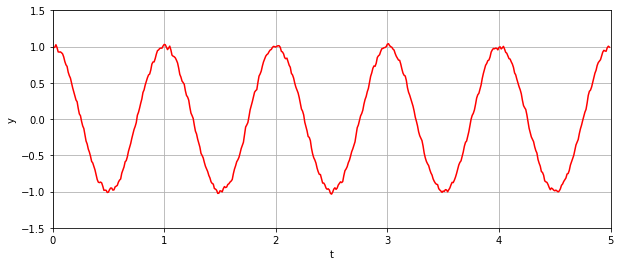

In [8]:
import scipy.signal
h = np.array([0.5,0.5])
y = scipy.signal.convolve(x,h,mode='valid')
ny = y.size
ty = np.zeros(ny)
for k in range(ny):
    ty[k] = te+te*k
figure(figsize=(10,4))
plot(ty,y,'r')
xlabel('t')
ylabel('y')
axis([0,5,-1.5,1.5])
grid()

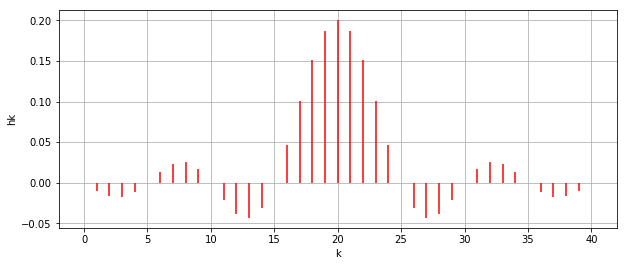

In [9]:
a=0.1
P=20
def g(k):
    return 2*a*np.sinc(2*(k-P)*a)
N=2*P+1
liste_k = np.arange(start=0,stop=N)
h = g(liste_k)
figure(figsize=(10,4))
vlines(liste_k,[0],h,'r')
xlabel('k')
ylabel('hk')
grid()

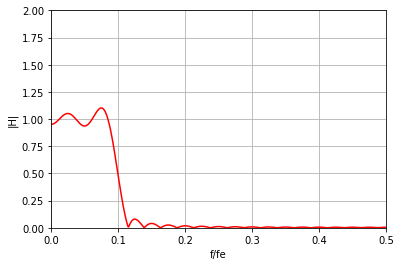

In [11]:
def Hf(f):
    s = 0.0
    for k in range(N):
       s += h[k]*np.exp(-1j*2*math.pi*k*f)
    return s

f = np.arange(start=0.0,stop=0.5,step=0.001)

figure(figsize=(6,4))
plot(f,np.absolute(Hf(f)),'r')
xlabel('f/fe')
ylabel('|H|')
axis([0,0.5,0,2])
grid()

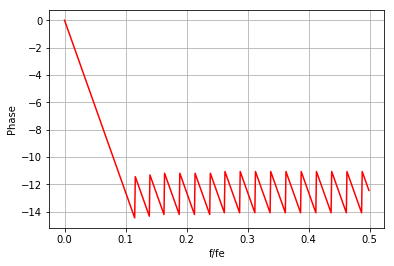

In [12]:
phase = np.unwrap(np.angle(Hf(f)))
figure(figsize=(6,4))
plot(f,phase,'r')
xlabel('f/fe')
ylabel('Phase')
grid()

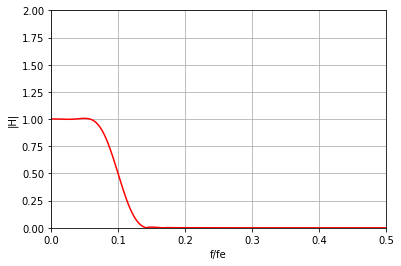

In [14]:
h = h*scipy.signal.hann(N)
figure(figsize=(6,4))
plot(f,np.absolute(Hf(f)),'r')
xlabel('f/fe')
ylabel('|H|')
axis([0,0.5,0,2])
grid()

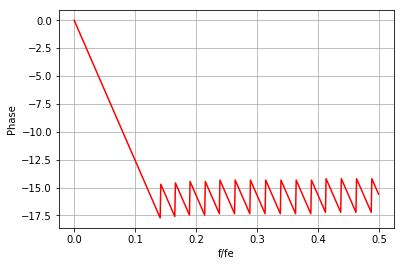

In [15]:
phase = np.unwrap(np.angle(Hf(f)))
figure(figsize=(6,4))
plot(f,phase,'r')
xlabel('f/fe')
ylabel('Phase')
grid()

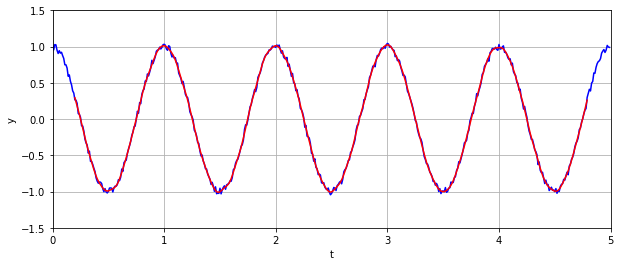

In [16]:
y = scipy.signal.convolve(x,h,mode='valid')
ny = y.size
ty = np.zeros(ny)
for k in range(ny):
    ty[k] = P*te+te*k
figure(figsize=(10,4))
plot(t,x,'b')
plot(ty,y,'r')
xlabel('t')
ylabel('y')
axis([0,5,-1.5,1.5])
grid()

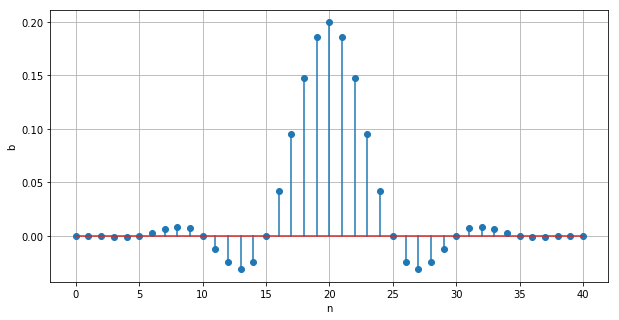

In [13]:
import numpy
import scipy.signal
from matplotlib.pyplot import *

P=20
b1 = scipy.signal.firwin(numtaps=2*P+1, cutoff=[0.1], window='hann', nyq=0.5)

figure(figsize=(10,5))
stem(b1)
xlabel("n")
ylabel("b")
grid()